# NATURAL LANGUAGE PROCESSING 

- This is a project that contains the news of the year 2020 with heading , summary , keywords , hashtags , publish_time,	body_polarity , body_polarity_score , title_polarity , title_polarity_score , country_origin ,	state_origin , city_origin.

- The main aim of the project is to analysis the whole dataset and find the most frequent and least frequent words in them 

- I have used Word2vec for converting the words into vectors and joing the columns [heading , summary , hashtags and keywords] to cleaned them and converted them to the list of lists. 

#### The general use of Word2vec along with data cleaning:

In [1]:
import pandas as pd
from gensim.models import Word2Vec 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.warn("deprecated", DeprecationWarning)

In [2]:
df= pd.read_csv('data.csv')

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df['Make Model'] = df['Make']+" "+df['Model']

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Make Model
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,BMW 1 Series M
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,BMW 1 Series
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,BMW 1 Series
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,BMW 1 Series
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,BMW 1 Series


In [7]:
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Make Model']]# For each row, combine all the columns into one column

In [8]:
df1.head()

,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,Make Model
0,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,BMW 1 Series M
1,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,BMW 1 Series
2,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,BMW 1 Series
3,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,BMW 1 Series
4,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible,BMW 1 Series


In [9]:
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)# Store them in a pandas dataframe
df2.head()

0    premium unleaded (required),MANUAL,rear wheel ...
1    premium unleaded (required),MANUAL,rear wheel ...
2    premium unleaded (required),MANUAL,rear wheel ...
3    premium unleaded (required),MANUAL,rear wheel ...
4    premium unleaded (required),MANUAL,rear wheel ...
dtype: object

In [10]:
df_clean = pd.DataFrame({'clean': df2})
df_clean.head()

,clean
0,"premium unleaded (required),MANUAL,rear wheel ..."
1,"premium unleaded (required),MANUAL,rear wheel ..."
2,"premium unleaded (required),MANUAL,rear wheel ..."
3,"premium unleaded (required),MANUAL,rear wheel ..."
4,"premium unleaded (required),MANUAL,rear wheel ..."


In [13]:
sent = [row.split(',') for row in df_clean['clean']]

### Word2vec contains parameters : 

##### window: The maximum distance between a target word and words around the target word. The default window is 5.

##### min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.

##### workers: The number of partitions during training and the default workers is 3.

##### sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [14]:
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [15]:
model['BMW 1 Series M']

array([-0.0204849 , -0.01770122,  0.00713988,  0.03917618,  0.05055831,
        0.00259075,  0.00883429, -0.02794452,  0.03821399, -0.0287793 ,
       -0.03508829,  0.018702  ,  0.03241395, -0.00651061, -0.04500169,
       -0.0568211 ,  0.00604356, -0.0224479 ,  0.04377754,  0.0221642 ,
        0.007255  , -0.02118144,  0.03309591, -0.04032118, -0.04392644,
        0.0089191 ,  0.03965561, -0.01194003,  0.00473964,  0.01570293,
       -0.04577348,  0.01347665,  0.00253267, -0.025796  ,  0.0433454 ,
        0.01239309, -0.04656052,  0.00464886,  0.03202005,  0.01245763,
       -0.01572259,  0.00055333,  0.02236922, -0.0180048 ,  0.03256125,
        0.05439731, -0.06145839,  0.00444222,  0.00267173,  0.02641791],
      dtype=float32)

In [16]:
model.similarity('BMW 1 Series M', 'Nissan Van')

0.8146649

In [17]:
model.most_similar('Mercedes-Benz SLK-Class')[:5]

[('Subaru SVX', 0.9933106303215027),
 ('BMW M6', 0.9932273626327515),
 ('Infiniti G37', 0.9914090037345886),
 ('Pontiac Solstice', 0.9901834726333618),
 ('Mercedes-Benz SLR McLaren', 0.9899530410766602)]

## Cosine Similarity

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
from numpy import dot
from numpy.linalg import norm

In [20]:
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]# only get the unique Maker_Model

In [21]:
 Maker_Model = list(df1['Make Model'].unique())

In [22]:
cosine_distance (model,'Mercedes-Benz SLK-Class',Maker_Model,5)

[('Subaru SVX', 0.9933107),
 ('BMW M6', 0.9932273),
 ('Infiniti G37', 0.99140906),
 ('Pontiac Solstice', 0.9901835),
 ('Mercedes-Benz SLR McLaren', 0.989953)]

# Word2vec

In [23]:
import pandas as pd
from gensim.models import Word2Vec 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.warn("deprecated", DeprecationWarning)

In [24]:
df= pd.read_csv('data.csv')

In [25]:
df['Make Model'] = df['Make']+" "+df['Model']

In [26]:
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Make Model']]# For each row, combine all the columns into one column

In [27]:
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)# Store them in a pandas dataframe
df2.head()

0    premium unleaded (required),MANUAL,rear wheel ...
1    premium unleaded (required),MANUAL,rear wheel ...
2    premium unleaded (required),MANUAL,rear wheel ...
3    premium unleaded (required),MANUAL,rear wheel ...
4    premium unleaded (required),MANUAL,rear wheel ...
dtype: object

In [25]:
df_clean = pd.DataFrame({'clean': df2})
df_clean.head()

,clean
0,"premium unleaded (required),MANUAL,rear wheel ..."
1,"premium unleaded (required),MANUAL,rear wheel ..."
2,"premium unleaded (required),MANUAL,rear wheel ..."
3,"premium unleaded (required),MANUAL,rear wheel ..."
4,"premium unleaded (required),MANUAL,rear wheel ..."


In [28]:
sent = [row.split(',') for row in df_clean['clean']]

In [29]:
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [30]:
model.most_similar('Mercedes-Benz SLK-Class')[:5]

[('Audi S5', 0.9954747557640076),
 ('Mercedes-Benz SLS AMG GT', 0.9950681328773499),
 ('Audi S3', 0.9941554069519043),
 ('BMW Z4', 0.9932556748390198),
 ('Mercedes-Benz CLK-Class', 0.9932053089141846)]

# Main Project : 

In [31]:
import pandas as pd
from gensim.models import Word2Vec 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
warnings.warn("deprecated", DeprecationWarning)
import nltk
import re
nltk.download('stopwords')


# pd.set_option('display.max_rows',None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
pd.set_option('display.max_columns',None)

In [34]:
df = pd.read_json('aylien_cleaned_1_Aug_44.json')
df.head()

,summary,heading,words_count,hashtags,keywords,publish_time,body_polarity,body_polarity_score,title_polarity,title_polarity_score,country_origin,state_origin,city_origin
0,"However, this restriction will not apply to in...",Ban on international passenger flights extende...,223,"[#DGCA, #DirectorateGeneralOfCivilAviation, #C...","[flights, passenger, international, passenger ...",2020-03-26 14:30:18,negative,0.988144,neutral,0.890838,IN,None,None
1,But leg-spinner Yuzvendra Chahal is utilising ...,Yuzvendra Chahal's,292,"[#India, #Coronavirus, #OneDayInternational, #...","[Yuzvendra Chahal, Chahal, Yuzvendra, TikTok v...",2020-03-26 14:29:28,positive,0.885754,neutral,0.407149,IN,None,None
2,So the math was simple and the step logical: L...,Opinion: COVID-19 Lockdown Is Needed But May N...,812,"[#Lockdown, #ListsOfTransformersCharacters, #I...","[Lockdown, COVID-19, Needed, Opinion, Problem,...",2020-03-26 14:29:28,negative,0.606026,negative,0.863666,IN,None,None
3,"Chief Ministers of three states - Bengal, Biha...","Amid Lockdown, Chief Ministers Seek Help For M...",401,"[#ChiefMinister, #Bengal, #Odisha, #Bihar, #Li...","[Chief, Migrant, Ministers, Labourers, Lockdow...",2020-03-26 14:29:28,negative,0.842977,neutral,0.734383,IN,None,None
4,"Finance Minister, Nirmala Sitharaman, today an...",Coronavirus Pandemic: Auto Industry Welcomes F...,604,"[#Crore, #Coronavirus, #FinanceMinister, #Lakh...","[Auto, Industry, Announcement, Crisis, Situati...",2020-03-26 14:29:28,negative,0.849670,negative,0.470863,IN,None,None


In [35]:
df = df[:537]

In [36]:
df2 = df.copy()

In [37]:
df1 = df.hashtags.copy()


In [38]:
df1.shape

(537,)

In [39]:
df.isnull().sum()

summary                   0
heading                   0
words_count               0
hashtags                  0
keywords                  0
publish_time              0
body_polarity             1
body_polarity_score       1
title_polarity            0
title_polarity_score      0
country_origin            0
state_origin            380
city_origin             380
dtype: int64

In [40]:
df1[1]

['#India',
 '#Coronavirus',
 '#OneDayInternational',
 '#IndianPremierLeague',
 '#Pandemic',
 '#GovernmentOfIndia',
 '#Lockdown',
 '#LegSpin',
 '#Twitter',
 '#DanceMove',
 '#SocialMedia',
 '#Virus',
 '#Twenty20International',
 '#ODI',
 '#NewZealand',
 '#Whitewash',
 '#ViratKohli',
 '#RoyalChallengersBangalore',
 '#Cricket',
 '#IPL',
 '#BCCI',
 '#BoardOfControlForCricketInIndia']

In [41]:
for i in range(len(df1)):
    df1[i] = ','.join(map(str, df1[i]))

In [42]:
df1.head()

0    #DGCA,#DirectorateGeneralOfCivilAviation,#Coro...
1    #India,#Coronavirus,#OneDayInternational,#Indi...
2    #Lockdown,#ListsOfTransformersCharacters,#Indi...
3    #ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...
4    #Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...
Name: hashtags, dtype: object

In [43]:
df3 = df1.to_frame()

In [44]:
df3.columns = ['Unlist']

In [45]:
df3.head()

,Unlist
0,"#DGCA,#DirectorateGeneralOfCivilAviation,#Coro..."
1,"#India,#Coronavirus,#OneDayInternational,#Indi..."
2,"#Lockdown,#ListsOfTransformersCharacters,#Indi..."
3,"#ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf..."
4,"#Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM..."


In [46]:
df4 = pd.concat([df3,df2],axis=1)

In [47]:
df4.head()

,Unlist,summary,heading,words_count,hashtags,keywords,publish_time,body_polarity,body_polarity_score,title_polarity,title_polarity_score,country_origin,state_origin,city_origin
0,"#DGCA,#DirectorateGeneralOfCivilAviation,#Coro...","However, this restriction will not apply to in...",Ban on international passenger flights extende...,223,"[#DGCA, #DirectorateGeneralOfCivilAviation, #C...","[flights, passenger, international, passenger ...",2020-03-26 14:30:18,negative,0.988144,neutral,0.890838,IN,None,None
1,"#India,#Coronavirus,#OneDayInternational,#Indi...",But leg-spinner Yuzvendra Chahal is utilising ...,Yuzvendra Chahal's,292,"[#India, #Coronavirus, #OneDayInternational, #...","[Yuzvendra Chahal, Chahal, Yuzvendra, TikTok v...",2020-03-26 14:29:28,positive,0.885754,neutral,0.407149,IN,None,None
2,"#Lockdown,#ListsOfTransformersCharacters,#Indi...",So the math was simple and the step logical: L...,Opinion: COVID-19 Lockdown Is Needed But May N...,812,"[#Lockdown, #ListsOfTransformersCharacters, #I...","[Lockdown, COVID-19, Needed, Opinion, Problem,...",2020-03-26 14:29:28,negative,0.606026,negative,0.863666,IN,None,None
3,"#ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...","Chief Ministers of three states - Bengal, Biha...","Amid Lockdown, Chief Ministers Seek Help For M...",401,"[#ChiefMinister, #Bengal, #Odisha, #Bihar, #Li...","[Chief, Migrant, Ministers, Labourers, Lockdow...",2020-03-26 14:29:28,negative,0.842977,neutral,0.734383,IN,None,None
4,"#Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...","Finance Minister, Nirmala Sitharaman, today an...",Coronavirus Pandemic: Auto Industry Welcomes F...,604,"[#Crore, #Coronavirus, #FinanceMinister, #Lakh...","[Auto, Industry, Announcement, Crisis, Situati...",2020-03-26 14:29:28,negative,0.849670,negative,0.470863,IN,None,None


In [48]:
df2 = df2.keywords.copy()

In [49]:
df2.head()

0    [flights, passenger, international, passenger ...
1    [Yuzvendra Chahal, Chahal, Yuzvendra, TikTok v...
2    [Lockdown, COVID-19, Needed, Opinion, Problem,...
3    [Chief, Migrant, Ministers, Labourers, Lockdow...
4    [Auto, Industry, Announcement, Crisis, Situati...
Name: keywords, dtype: object

In [50]:
df2[1]

['Yuzvendra Chahal',
 'Chahal',
 'Yuzvendra',
 'TikTok videos',
 'videos',
 'India',
 'time',
 'TikTok',
 'Indian',
 'League',
 'start',
 'International',
 'weeks',
 'cricket',
 'Coronavirus',
 'funny',
 'followers',
 'April',
 'government',
 'Twenty20 International',
 'tweeted',
 'Indian government',
 'Indian Premier League',
 'IPL',
 'dance move',
 'Royal Challengers Bangalore',
 'whitewash',
 'BCCI',
 'social media',
 'Virat Kohli',
 'lockdown',
 'viral',
 'One-day International',
 'ODI',
 'pandemic',
 'New Zealand',
 'leg-spinner',
 'coronavirus']

In [51]:
for i in range(len(df1)):
    df2[i] = ','.join(map(str, df2[i]))

In [52]:
df2.head()

0    flights,passenger,international,passenger flig...
1    Yuzvendra Chahal,Chahal,Yuzvendra,TikTok video...
2    Lockdown,COVID-19,Needed,Opinion,Problem,lockd...
3    Chief,Migrant,Ministers,Labourers,Lockdown,Chi...
4    Auto,Industry,Announcement,Crisis,Situation,Ex...
Name: keywords, dtype: object

In [53]:
df3 = df2.to_frame()

In [54]:
df3.head()

,keywords
0,"flights,passenger,international,passenger flig..."
1,"Yuzvendra Chahal,Chahal,Yuzvendra,TikTok video..."
2,"Lockdown,COVID-19,Needed,Opinion,Problem,lockd..."
3,"Chief,Migrant,Ministers,Labourers,Lockdown,Chi..."
4,"Auto,Industry,Announcement,Crisis,Situation,Ex..."


In [55]:
df3.columns = ['Unlist_keywords']

In [56]:
df4 = pd.concat([df3,df4],axis=1)

In [57]:
df4.head()

,Unlist_keywords,Unlist,summary,heading,words_count,hashtags,keywords,publish_time,body_polarity,body_polarity_score,title_polarity,title_polarity_score,country_origin,state_origin,city_origin
0,"flights,passenger,international,passenger flig...","#DGCA,#DirectorateGeneralOfCivilAviation,#Coro...","However, this restriction will not apply to in...",Ban on international passenger flights extende...,223,"[#DGCA, #DirectorateGeneralOfCivilAviation, #C...","[flights, passenger, international, passenger ...",2020-03-26 14:30:18,negative,0.988144,neutral,0.890838,IN,None,None
1,"Yuzvendra Chahal,Chahal,Yuzvendra,TikTok video...","#India,#Coronavirus,#OneDayInternational,#Indi...",But leg-spinner Yuzvendra Chahal is utilising ...,Yuzvendra Chahal's,292,"[#India, #Coronavirus, #OneDayInternational, #...","[Yuzvendra Chahal, Chahal, Yuzvendra, TikTok v...",2020-03-26 14:29:28,positive,0.885754,neutral,0.407149,IN,None,None
2,"Lockdown,COVID-19,Needed,Opinion,Problem,lockd...","#Lockdown,#ListsOfTransformersCharacters,#Indi...",So the math was simple and the step logical: L...,Opinion: COVID-19 Lockdown Is Needed But May N...,812,"[#Lockdown, #ListsOfTransformersCharacters, #I...","[Lockdown, COVID-19, Needed, Opinion, Problem,...",2020-03-26 14:29:28,negative,0.606026,negative,0.863666,IN,None,None
3,"Chief,Migrant,Ministers,Labourers,Lockdown,Chi...","#ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...","Chief Ministers of three states - Bengal, Biha...","Amid Lockdown, Chief Ministers Seek Help For M...",401,"[#ChiefMinister, #Bengal, #Odisha, #Bihar, #Li...","[Chief, Migrant, Ministers, Labourers, Lockdow...",2020-03-26 14:29:28,negative,0.842977,neutral,0.734383,IN,None,None
4,"Auto,Industry,Announcement,Crisis,Situation,Ex...","#Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...","Finance Minister, Nirmala Sitharaman, today an...",Coronavirus Pandemic: Auto Industry Welcomes F...,604,"[#Crore, #Coronavirus, #FinanceMinister, #Lakh...","[Auto, Industry, Announcement, Crisis, Situati...",2020-03-26 14:29:28,negative,0.849670,negative,0.470863,IN,None,None


In [58]:
df5 = df4[['summary','heading']]

In [59]:
df5 = df5.apply(lambda x: ','.join(x.astype(str)), axis=1)# Store them in a pandas dataframe
df5[0]

'However, this restriction will not apply to international all-cargo operations and flights specifically approved by the DGCA. All international commercial passenger flights will remain suspended till April 14, aviation regulator DGCA announced on Thursday, amid a nationwide lockdown to prevent the spread of the novel coronavirus. The Directorate General of Civil Aviation (DGCA) on March 19 had announced that no international commercial passenger flight operations will take place in India from 1.30 am on March 23 to 5.30 am on March 29. “In continuation of circular-II dated 19.3.2020 issued on the subject cited-above, it has been decided that all scheduled international commercial passenger services shall remain closed till 1830 hrs GMT (0000 hrs of Indian Standard Time) of April 14, 2020," the aviation regulator said. "However, this restriction will not apply to international all-cargo operations and flights specifically approved by the DGCA," it said.,Ban on international passenger f

In [60]:
sum_head = pd.DataFrame({'sum_head': df5})
sum_head.head()

,sum_head
0,"However, this restriction will not apply to in..."
1,But leg-spinner Yuzvendra Chahal is utilising ...
2,So the math was simple and the step logical: L...
3,"Chief Ministers of three states - Bengal, Biha..."
4,"Finance Minister, Nirmala Sitharaman, today an..."


In [61]:
df4 = pd.concat([sum_head,df4],axis=1)

In [62]:
df4.head()

,sum_head,Unlist_keywords,Unlist,summary,heading,words_count,hashtags,keywords,publish_time,body_polarity,body_polarity_score,title_polarity,title_polarity_score,country_origin,state_origin,city_origin
0,"However, this restriction will not apply to in...","flights,passenger,international,passenger flig...","#DGCA,#DirectorateGeneralOfCivilAviation,#Coro...","However, this restriction will not apply to in...",Ban on international passenger flights extende...,223,"[#DGCA, #DirectorateGeneralOfCivilAviation, #C...","[flights, passenger, international, passenger ...",2020-03-26 14:30:18,negative,0.988144,neutral,0.890838,IN,None,None
1,But leg-spinner Yuzvendra Chahal is utilising ...,"Yuzvendra Chahal,Chahal,Yuzvendra,TikTok video...","#India,#Coronavirus,#OneDayInternational,#Indi...",But leg-spinner Yuzvendra Chahal is utilising ...,Yuzvendra Chahal's,292,"[#India, #Coronavirus, #OneDayInternational, #...","[Yuzvendra Chahal, Chahal, Yuzvendra, TikTok v...",2020-03-26 14:29:28,positive,0.885754,neutral,0.407149,IN,None,None
2,So the math was simple and the step logical: L...,"Lockdown,COVID-19,Needed,Opinion,Problem,lockd...","#Lockdown,#ListsOfTransformersCharacters,#Indi...",So the math was simple and the step logical: L...,Opinion: COVID-19 Lockdown Is Needed But May N...,812,"[#Lockdown, #ListsOfTransformersCharacters, #I...","[Lockdown, COVID-19, Needed, Opinion, Problem,...",2020-03-26 14:29:28,negative,0.606026,negative,0.863666,IN,None,None
3,"Chief Ministers of three states - Bengal, Biha...","Chief,Migrant,Ministers,Labourers,Lockdown,Chi...","#ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...","Chief Ministers of three states - Bengal, Biha...","Amid Lockdown, Chief Ministers Seek Help For M...",401,"[#ChiefMinister, #Bengal, #Odisha, #Bihar, #Li...","[Chief, Migrant, Ministers, Labourers, Lockdow...",2020-03-26 14:29:28,negative,0.842977,neutral,0.734383,IN,None,None
4,"Finance Minister, Nirmala Sitharaman, today an...","Auto,Industry,Announcement,Crisis,Situation,Ex...","#Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...","Finance Minister, Nirmala Sitharaman, today an...",Coronavirus Pandemic: Auto Industry Welcomes F...,604,"[#Crore, #Coronavirus, #FinanceMinister, #Lakh...","[Auto, Industry, Announcement, Crisis, Situati...",2020-03-26 14:29:28,negative,0.849670,negative,0.470863,IN,None,None


In [63]:
df4.drop(['keywords','hashtags','summary','heading'],axis=1,inplace=True)

In [64]:
df4.head()

,sum_head,Unlist_keywords,Unlist,words_count,publish_time,body_polarity,body_polarity_score,title_polarity,title_polarity_score,country_origin,state_origin,city_origin
0,"However, this restriction will not apply to in...","flights,passenger,international,passenger flig...","#DGCA,#DirectorateGeneralOfCivilAviation,#Coro...",223,2020-03-26 14:30:18,negative,0.988144,neutral,0.890838,IN,None,None
1,But leg-spinner Yuzvendra Chahal is utilising ...,"Yuzvendra Chahal,Chahal,Yuzvendra,TikTok video...","#India,#Coronavirus,#OneDayInternational,#Indi...",292,2020-03-26 14:29:28,positive,0.885754,neutral,0.407149,IN,None,None
2,So the math was simple and the step logical: L...,"Lockdown,COVID-19,Needed,Opinion,Problem,lockd...","#Lockdown,#ListsOfTransformersCharacters,#Indi...",812,2020-03-26 14:29:28,negative,0.606026,negative,0.863666,IN,None,None
3,"Chief Ministers of three states - Bengal, Biha...","Chief,Migrant,Ministers,Labourers,Lockdown,Chi...","#ChiefMinister,#Bengal,#Odisha,#Bihar,#ListsOf...",401,2020-03-26 14:29:28,negative,0.842977,neutral,0.734383,IN,None,None
4,"Finance Minister, Nirmala Sitharaman, today an...","Auto,Industry,Announcement,Crisis,Situation,Ex...","#Crore,#Coronavirus,#FinanceMinister,#Lakh,#FM...",604,2020-03-26 14:29:28,negative,0.849670,negative,0.470863,IN,None,None


In [67]:
df_new = df4[['sum_head','Unlist','Unlist_keywords']]

In [68]:
df_new = df_new.apply(lambda x: ','.join(x.astype(str)), axis=1)# Store them in a pandas dataframe
df_new[0]

'However, this restriction will not apply to international all-cargo operations and flights specifically approved by the DGCA. All international commercial passenger flights will remain suspended till April 14, aviation regulator DGCA announced on Thursday, amid a nationwide lockdown to prevent the spread of the novel coronavirus. The Directorate General of Civil Aviation (DGCA) on March 19 had announced that no international commercial passenger flight operations will take place in India from 1.30 am on March 23 to 5.30 am on March 29. “In continuation of circular-II dated 19.3.2020 issued on the subject cited-above, it has been decided that all scheduled international commercial passenger services shall remain closed till 1830 hrs GMT (0000 hrs of Indian Standard Time) of April 14, 2020," the aviation regulator said. "However, this restriction will not apply to international all-cargo operations and flights specifically approved by the DGCA," it said.,Ban on international passenger f

In [69]:
df_new = df_new.to_frame()
df_new.columns = ['allwords']
df_new.head()

,allwords
0,"However, this restriction will not apply to in..."
1,But leg-spinner Yuzvendra Chahal is utilising ...
2,So the math was simple and the step logical: L...
3,"Chief Ministers of three states - Bengal, Biha..."
4,"Finance Minister, Nirmala Sitharaman, today an..."


In [70]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
corpus = []
for i in range(0, len(df_new)):
    review = re.sub('[^a-zA-Z]', ' ', df_new['allwords'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
corpus[0]

'however restriction apply international cargo operation flight specifically approved dgca international commercial passenger flight remain suspended till april aviation regulator dgca announced thursday amid nationwide lockdown prevent spread novel coronavirus directorate general civil aviation dgca march announced international commercial passenger flight operation take place india march march continuation circular ii dated issued subject cited decided scheduled international commercial passenger service shall remain closed till hr gmt hr indian standard time april aviation regulator said however restriction apply international cargo operation flight specifically approved dgca said ban international passenger flight extended till apr dgca directorategeneralofcivilaviation coronavirus lockdown india gmt greenwichmeantime time ministryofhealthandfamilywelfare primeministeroftheunitedkingdom narendramodi reuters flight passenger international passenger flight passenger flight coronaviru

In [72]:
df_clean = pd.DataFrame(corpus,columns = ['text'])

In [73]:
df_clean.head()

,text
0,however restriction apply international cargo ...
1,leg spinner yuzvendra chahal utilising self qu...
2,math simple step logical lockdown three week i...
3,chief minister three state bengal bihar odisha...
4,finance minister nirmala sitharaman today anno...


In [75]:
sent = [row.split(' ') for row in df_clean['text']]

In [76]:
from gensim.models import Word2Vec 
model = Word2Vec(sent, min_count=150,size= 100,workers=3, window =20, sg = 1)

In [77]:
model.most_similar('coronavirus')[:5]

[('spread', 0.9358190298080444),
 ('one', 0.928183913230896),
 ('said', 0.8781427145004272),
 ('covid', 0.8730661273002625),
 ('also', 0.8703159093856812)]

In [78]:
model.wv.index2entity[:20]  ## top 20 most frequent words

['coronavirus',
 'lockdown',
 'covid',
 'india',
 'pandemic',
 'said',
 'minister',
 'people',
 'virus',
 'government',
 'health',
 'also',
 'lakh',
 'crore',
 'day',
 'worker',
 'hospital',
 'time',
 'country',
 'police']

In [79]:
model['coronavirus']

array([-0.0712617 ,  0.06097317, -0.10089555,  0.06229949,  0.09261589,
       -0.09986919, -0.05278067, -0.04135507, -0.1390331 ,  0.00854663,
       -0.04334659, -0.10887774, -0.05538153, -0.10130405, -0.11166807,
       -0.11713999,  0.01927908,  0.01298192,  0.02419367,  0.06616232,
       -0.13269915,  0.01627182, -0.01010376,  0.02622263,  0.09045358,
       -0.19707775, -0.11340899, -0.09474751, -0.22030324, -0.03387759,
       -0.20162365, -0.13439493, -0.07391088,  0.05562932,  0.24484079,
        0.00963341, -0.04318049,  0.0473559 , -0.01091361,  0.16438766,
       -0.20922874, -0.06027982, -0.00608904, -0.14293829, -0.08279911,
       -0.09902443, -0.0116671 ,  0.08705901,  0.02159117, -0.04001775,
        0.09244829, -0.09656172, -0.10396004, -0.12394343,  0.05625261,
        0.13162856,  0.06200928,  0.11729402,  0.17949364,  0.03793729,
        0.05248019,  0.07889596,  0.01056638, -0.16136862,  0.03305552,
        0.03996818, -0.03160854, -0.1723068 , -0.03845375, -0.08

In [80]:
words=list(model.wv.vocab)
print(words)

['thursday', 'lockdown', 'spread', 'coronavirus', 'march', 'india', 'service', 'indian', 'time', 'said', 'country', 'health', 'ministry', 'minister', 'quarantine', 'video', 'one', 'day', 'new', 'pandemic', 'twitter', 'virus', 'government', 'social', 'people', 'patient', 'worker', 'covid', 'hospital', 'infection', 'month', 'case', 'chief', 'state', 'food', 'medical', 'crore', 'daily', 'relief', 'finance', 'per', 'also', 'poor', 'lakh', 'facebook', 'due', 'outbreak', 'police', 'district', 'home', 'official', 'news', 'instagram', 'delhi', 'year', 'package', 'world', 'positive', 'bank', 'r']


In [81]:
X=model[model.wv.vocab]
df=pd.DataFrame(X)
df.shape
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.080987,-0.119566,-0.066721,0.093456,0.082815,-0.119667,0.050768,0.087772,-0.055298,0.002668,-0.046911,-0.025861,-0.018621,-0.078658,-0.033173,-0.114148,-0.010514,0.052419,-0.027132,-0.015415,-0.042239,0.046696,-0.135096,-0.038542,0.048803,-0.202968,-0.110663,-0.197387,-0.106578,-0.047895,-0.043875,0.030656,-0.066983,0.072922,0.311366,0.058248,0.007137,0.114047,0.026943,0.279725,-0.109811,-0.043312,-0.079929,-0.112064,-0.049201,-0.125077,0.011793,0.242362,0.031477,0.058062,0.132685,-0.066884,-0.175552,-0.136399,-0.029047,0.163756,-0.061617,0.028818,0.157825,0.046285,0.088926,0.101350,0.025940,-0.161757,0.098259,-0.034808,0.079285,-0.217371,-0.115051,-0.083060,0.246111,0.254008,0.007586,-0.007133,-0.007730,0.295398,0.016739,-0.173470,0.200746,0.070384,0.158162,0.138989,-0.229633,-0.024779,0.074410,0.109246,-0.144794,0.111516,0.023668,0.062015,0.142895,0.068102,-0.119954,0.021104,0.095954,-0.076687,0.073456,-0.118878,0.026317,-0.199623
1,-0.108113,-0.036367,-0.058665,0.100388,0.152449,-0.005359,0.054911,-0.003319,-0.242000,0.016678,-0.024199,-0.267231,-0.016855,-0.094178,-0.171748,-0.281946,-0.004253,-0.053707,-0.043805,0.065120,-0.052252,0.174233,-0.123148,0.006990,0.033698,-0.164651,-0.101807,-0.106609,-0.256512,-0.016687,-0.168454,-0.136187,0.092285,0.037105,0.315760,0.047912,-0.021413,-0.035766,-0.037210,0.187453,-0.069646,-0.094414,-0.032301,-0.077203,-0.064322,-0.036671,-0.029921,0.150794,0.070378,0.023806,0.175353,-0.025791,-0.122605,-0.141199,0.007179,0.046724,0.074880,0.029166,0.328660,0.018238,0.090270,0.078399,0.033963,-0.047444,-0.022833,0.039136,0.002447,-0.250847,-0.120590,-0.156941,0.196462,0.264783,-0.038391,-0.075681,0.038540,0.148919,-0.001559,-0.141866,0.144310,0.041113,0.055657,0.100568,-0.150169,-0.020072,0.117090,0.142277,-0.178851,0.172889,-0.019855,0.051106,0.271368,0.063405,-0.111401,-0.136618,0.110163,0.002718,0.124295,-0.059105,-0.094860,-0.070605
2,-0.130131,0.036109,-0.074895,0.054014,0.088107,-0.083002,-0.028984,0.023919,-0.204970,-0.054885,-0.028315,-0.145732,-0.024080,-0.065378,-0.103158,-0.146873,0.059498,-0.016098,0.012462,0.076594,-0.111770,0.019529,-0.059444,0.010186,0.039386,-0.213482,-0.140758,-0.147265,-0.205704,-0.034564,-0.213883,-0.116533,-0.049997,0.043647,0.274860,0.056006,-0.100441,0.033877,0.014586,0.159857,-0.157421,-0.043221,-0.068223,-0.105540,-0.097584,-0.068657,0.001059,0.164127,0.097799,-0.056129,0.111434,-0.044695,-0.103528,-0.124496,-0.004056,0.110186,0.015302,0.009651,0.210852,0.045867,0.033531,0.044678,0.006246,-0.065993,0.014019,0.044485,-0.020707,-0.192714,-0.059457,-0.133496,0.257526,0.218864,0.037227,-0.024351,0.082961,0.185106,0.005371,-0.086957,0.200627,0.086816,0.070259,0.082426,-0.238670,-0.008702,0.110478,0.167618,-0.123919,0.189983,-0.006942,0.079039,0.173689,0.069167,-0.170397,-0.059841,0.063878,-0.029402,0.060613,-0.147002,-0.048808,-0.060612
3,-0.071262,0.060973,-0.100896,0.062299,0.092616,-0.099869,-0.052781,-0.041355,-0.139033,0.008547,-0.043347,-0.108878,-0.055382,-0.101304,-0.111668,-0.117140,0.019279,0.012982,0.024194,0.066162,-0.132699,0.016272,-0.010104,0.026223,0.090454,-0.197078,-0.113409,-0.094748,-0.220303,-0.033878,-0.201624,-0.134395,-0.073911,0.055629,0.244841,0.009633,-0.043180,0.047356,-0.010914,0.164388,-0.209229,-0.060280,-0.006089,-0.142938,-0.082799,-0.099024,-0.011667,0.087059,0.021591,-0.040018,0.092448,-0.096562,-0.103960,-0.123943,0.056253,0.131629,0.062009,0.117294,0.179494,0.037937,0.052480,0.078896,0.010566,-0.161369,0.033056,0.039968,-0.031609,-0.172307,-0.038454,-0.086294,0.227387,0.177698,0.082315,0.016970,0.062714,0.238912,-0.080534,-0.101112,0.214625,0.108811,0.093359,0.090963,-0.243287,0.032709,0.077545,0.152056,-0.083742,0.147860,-0.10575

In [82]:
#Computing the correlation matrix
X_corr=df.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(X,new_vectors)

In [83]:
model.wv.index2entity[:20]

['coronavirus',
 'lockdown',
 'covid',
 'india',
 'pandemic',
 'said',
 'minister',
 'people',
 'virus',
 'government',
 'health',
 'also',
 'lakh',
 'crore',
 'day',
 'worker',
 'hospital',
 'time',
 'country',
 'police']

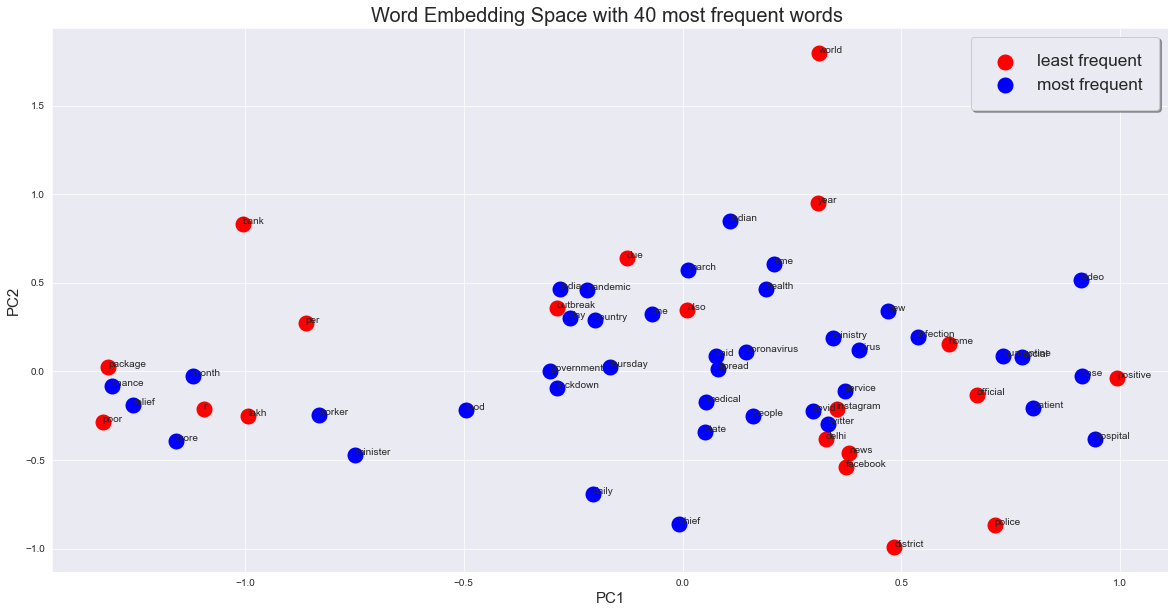

In [84]:
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(neww_X[40:,0],neww_X[40:,1],linewidths=10,color='red',label='least frequent')
plt.scatter(neww_X[:40,0],neww_X[:40,1],linewidths=10,color='blue',label = 'most frequent')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize='xx-large')
plt.title("Word Embedding Space with 40 most frequent words ",size=20)
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))
plt.savefig('most_least_words.png', dpi=400, bbox_inches='tight')
#   plt.annotate(word,xy=(neww_X[i+19,0],neww_X[i+19,1]))  

### Words with least frequency

In [85]:
for word in model.wv.vocab:
    if(model.wv.vocab[word].count <180):
        print((word, model.wv.vocab[word].count))
        
    

('spread', 151)
('ministry', 153)
('video', 152)
('one', 158)
('patient', 175)
('daily', 160)
('relief', 156)
('finance', 167)
('poor', 157)
('facebook', 155)
('news', 152)
('bank', 164)


In [86]:
vocab1 = model.wv.index2entity[-20:]  #### Least 20 words
vocab1

['outbreak',
 'service',
 'positive',
 'per',
 'official',
 'package',
 'world',
 'due',
 'patient',
 'finance',
 'bank',
 'daily',
 'one',
 'poor',
 'relief',
 'facebook',
 'ministry',
 'video',
 'news',
 'spread']